# How can we do transfer learning?

**Background:**

The purpose of this notebook is to transform a .wav file into a spectrogram and then feed it into a well known model such as InceptionV3 for feature generation

## Libraries and File Locations

In [2]:
import sys
sys.path.append("..")

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
import soundfile
from scipy import signal
import librosa
import matplotlib.pyplot as plt
import specdisplay

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/cache.py:36: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if self.cachedir is not None:
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/cache.py:36: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if self.cachedir is not None:
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/cache.py:36: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if self.cachedir is not None:
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/cache.py:36: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if self.cachedir is not None:
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/cache.py:36: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if self.cachedir is not None:
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/cache.py:36: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if self.cachedir is not None:
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/

In [4]:
test_file_dir = "../tests/wav/"

## Load sample WAV File

Loading in the form of melspectrograms

**MFCCs and Spectrograms**

In [5]:
n_mels = 128

In [6]:
test_png_file_name = 'sample_spectrogram.png'

In [7]:
samples, sample_rate = soundfile.read(test_file_dir+"hello.wav")

In [8]:
samples.shape

(66000, 4)

Note that the below function (power_to_db) is equivalent to new: librosa.core.logamplitude

In [9]:
def extract_spectrogram(samples,sample_rate,n_mels=23,n_fft=2048):
    feature_set = []
    if samples.shape[1:]:
        channels = samples.shape[1:][0]
    else:
        channels = 1
        samples = np.expand_dims(samples, axis=1)
    for i in range(channels):
        sample_channel_x = samples[:,i]
        mel_spectrogram = librosa.feature.melspectrogram(y=sample_channel_x, 
                                                     sr=sample_rate,
                                                     n_fft=n_fft, 
                                                     n_mels = n_mels
                                                        )
        decibel_spec = librosa.logamplitude(mel_spectrogram,ref_power=np.max)
        feature_set.append(decibel_spec)
    feature_set = np.array(feature_set)
    feature_set = np.mean(feature_set,axis=0)
    return feature_set

../specdisplay.py:676: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  if np.issubdtype(data.dtype, np.complex):


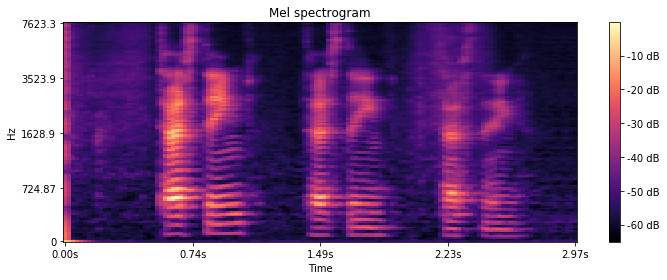

In [10]:
decibel_spec = extract_spectrogram(samples,sample_rate,n_mels=n_mels)
#decibel_spec = np.mean(features,axis=0)
plt.figure(figsize=(10, 4))
specdisplay.specshow(decibel_spec,
                          y_axis='mel', fmax=8000,
                          x_axis='time',freq_fmt = 'Hz')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

In [11]:
fig = plt.figure(figsize=(10,4))
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
specdisplay.specshow(decibel_spec,
                          y_axis='mel', fmax=8000,
                          x_axis='frames',freq_fmt = 'Hz')

# Display the spectrogram on a mel scale
# sample rate and hop length parameters are used to render the time axis
# Make the figure layout compact


plt.savefig(test_png_file_name)
plt.close()

# Creating the PNG spectrograms

## NOTE!!

We're averaging across channels, come back and try a different approach if that's not working

Follow the structure in this article:
https://urbansounddataset.weebly.com/urbansound8k.html

In [12]:
urban_sounds_folder = "/media/romulo/6237-3231/urban_sound_challenge/"

In [13]:
metadata = pd.read_csv(urban_sounds_folder+'metadata/UrbanSound8K.csv')

0 - slice_file_name
1 - fsID
5 - fold
6 - classID
7 - class

Class ID Mappings:

A numeric identifier of the sound class:

0 = air_conditioner

1 = car_horn

2 = children_playing

3 = dog_bark

4 = drilling

5 = engine_idling

6 = gun_shot

7 = jackhammer

8 = siren

9 = street_music


In [14]:
for index, row in metadata[6445::].iterrows():
    print("Transforming file {}".format(index))
    if not os.path.exists(urban_sounds_folder+'spectrograms/' + row['class']):
        os.makedirs(urban_sounds_folder+'spectrograms/' + row['class'])

    #y, sr = librosa.load(urban_sounds_folder+"audio/fold" + str(row['fold'])+ "/" + str(row['slice_file_name']))
    # Let's make and display a mel-scaled power (energy-squared) spectrogram
    #S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128,n_fft=2048)

    # Convert to log scale (dB). We'll use the peak power as reference.
    #log_S = librosa.logamplitude(S, ref_power=np.max)
    y, sr = soundfile.read(urban_sounds_folder+"audio/fold" + str(row['fold'])+ "/" + str(row['slice_file_name']))
    log_S = extract_spectrogram(y,sr,n_mels=n_mels,n_fft=2048)
    # Make a new figure
    fig = plt.figure(figsize=(12,4))
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)

    # Display the spectrogram on a mel scale
    # sample rate and hop length parameters are used to render the time axis
    specdisplay.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')

    # Make the figure layout compact

    #plt.show()
    plt.savefig(urban_sounds_folder+'spectrograms/' + row['class'] + '/' + row['slice_file_name'] + '.png')
    plt.close()

Transforming file 6445
Transforming file 6446
Transforming file 6447
Transforming file 6448
Transforming file 6449
Transforming file 6450
Transforming file 6451
Transforming file 6452
Transforming file 6453
Transforming file 6454
Transforming file 6455
Transforming file 6456
Transforming file 6457
Transforming file 6458
Transforming file 6459
Transforming file 6460
Transforming file 6461
Transforming file 6462
Transforming file 6463
Transforming file 6464
Transforming file 6465
Transforming file 6466
Transforming file 6467
Transforming file 6468
Transforming file 6469
Transforming file 6470
Transforming file 6471
Transforming file 6472
Transforming file 6473
Transforming file 6474
Transforming file 6475
Transforming file 6476
Transforming file 6477
Transforming file 6478
Transforming file 6479
Transforming file 6480
Transforming file 6481
Transforming file 6482
Transforming file 6483
Transforming file 6484
Transforming file 6485
Transforming file 6486
Transforming file 6487
Transformin

Transforming file 6802
Transforming file 6803
Transforming file 6804
Transforming file 6805
Transforming file 6806
Transforming file 6807
Transforming file 6808
Transforming file 6809
Transforming file 6810
Transforming file 6811
Transforming file 6812
Transforming file 6813
Transforming file 6814
Transforming file 6815
Transforming file 6816
Transforming file 6817
Transforming file 6818
Transforming file 6819
Transforming file 6820
Transforming file 6821
Transforming file 6822
Transforming file 6823
Transforming file 6824
Transforming file 6825
Transforming file 6826
Transforming file 6827
Transforming file 6828
Transforming file 6829
Transforming file 6830
Transforming file 6831
Transforming file 6832
Transforming file 6833
Transforming file 6834
Transforming file 6835
Transforming file 6836
Transforming file 6837
Transforming file 6838
Transforming file 6839
Transforming file 6840
Transforming file 6841
Transforming file 6842
Transforming file 6843
Transforming file 6844
Transformin

Transforming file 7159
Transforming file 7160
Transforming file 7161
Transforming file 7162
Transforming file 7163
Transforming file 7164
Transforming file 7165
Transforming file 7166
Transforming file 7167
Transforming file 7168
Transforming file 7169
Transforming file 7170
Transforming file 7171
Transforming file 7172
Transforming file 7173
Transforming file 7174
Transforming file 7175
Transforming file 7176
Transforming file 7177
Transforming file 7178
Transforming file 7179
Transforming file 7180
Transforming file 7181
Transforming file 7182
Transforming file 7183
Transforming file 7184
Transforming file 7185
Transforming file 7186
Transforming file 7187
Transforming file 7188
Transforming file 7189
Transforming file 7190
Transforming file 7191
Transforming file 7192
Transforming file 7193
Transforming file 7194
Transforming file 7195
Transforming file 7196
Transforming file 7197
Transforming file 7198
Transforming file 7199
Transforming file 7200
Transforming file 7201
Transformin

Transforming file 7516
Transforming file 7517
Transforming file 7518
Transforming file 7519
Transforming file 7520
Transforming file 7521
Transforming file 7522
Transforming file 7523
Transforming file 7524
Transforming file 7525
Transforming file 7526
Transforming file 7527
Transforming file 7528
Transforming file 7529
Transforming file 7530
Transforming file 7531
Transforming file 7532
Transforming file 7533
Transforming file 7534
Transforming file 7535
Transforming file 7536
Transforming file 7537
Transforming file 7538
Transforming file 7539
Transforming file 7540
Transforming file 7541
Transforming file 7542
Transforming file 7543
Transforming file 7544
Transforming file 7545
Transforming file 7546
Transforming file 7547
Transforming file 7548
Transforming file 7549
Transforming file 7550
Transforming file 7551
Transforming file 7552
Transforming file 7553
Transforming file 7554
Transforming file 7555
Transforming file 7556
Transforming file 7557
Transforming file 7558
Transformin

Transforming file 7873
Transforming file 7874
Transforming file 7875
Transforming file 7876
Transforming file 7877
Transforming file 7878
Transforming file 7879
Transforming file 7880
Transforming file 7881
Transforming file 7882
Transforming file 7883
Transforming file 7884
Transforming file 7885
Transforming file 7886
Transforming file 7887
Transforming file 7888
Transforming file 7889
Transforming file 7890
Transforming file 7891
Transforming file 7892
Transforming file 7893
Transforming file 7894
Transforming file 7895
Transforming file 7896
Transforming file 7897
Transforming file 7898
Transforming file 7899
Transforming file 7900
Transforming file 7901
Transforming file 7902
Transforming file 7903
Transforming file 7904
Transforming file 7905
Transforming file 7906
Transforming file 7907
Transforming file 7908
Transforming file 7909
Transforming file 7910
Transforming file 7911
Transforming file 7912
Transforming file 7913
Transforming file 7914
Transforming file 7915
Transformin

Transforming file 8231
Transforming file 8232
Transforming file 8233
Transforming file 8234
Transforming file 8235
Transforming file 8236
Transforming file 8237
Transforming file 8238
Transforming file 8239
Transforming file 8240
Transforming file 8241
Transforming file 8242
Transforming file 8243
Transforming file 8244
Transforming file 8245
Transforming file 8246
Transforming file 8247
Transforming file 8248
Transforming file 8249
Transforming file 8250
Transforming file 8251
Transforming file 8252
Transforming file 8253
Transforming file 8254
Transforming file 8255
Transforming file 8256
Transforming file 8257
Transforming file 8258
Transforming file 8259
Transforming file 8260
Transforming file 8261
Transforming file 8262
Transforming file 8263
Transforming file 8264
Transforming file 8265
Transforming file 8266
Transforming file 8267
Transforming file 8268
Transforming file 8269
Transforming file 8270
Transforming file 8271
Transforming file 8272
Transforming file 8273
Transformin

Transforming file 8588
Transforming file 8589
Transforming file 8590
Transforming file 8591
Transforming file 8592
Transforming file 8593
Transforming file 8594
Transforming file 8595
Transforming file 8596
Transforming file 8597
Transforming file 8598
Transforming file 8599
Transforming file 8600
Transforming file 8601
Transforming file 8602
Transforming file 8603
Transforming file 8604
Transforming file 8605
Transforming file 8606
Transforming file 8607
Transforming file 8608
Transforming file 8609
Transforming file 8610
Transforming file 8611
Transforming file 8612
Transforming file 8613
Transforming file 8614
Transforming file 8615
Transforming file 8616
Transforming file 8617
Transforming file 8618
Transforming file 8619
Transforming file 8620
Transforming file 8621
Transforming file 8622
Transforming file 8623
Transforming file 8624
Transforming file 8625
Transforming file 8626
Transforming file 8627
Transforming file 8628
Transforming file 8629
Transforming file 8630
Transformin

# Codebase to create the PNG images we need

[https://medium.com/deepdeploy/transfer-learning-for-sound-classification-c9696c931f7d](https://medium.com/deepdeploy/transfer-learning-for-sound-classification-c9696c931f7d)

## Next Step Feed into InceptionV3

Follow this [https://www.kaggle.com/kmader/transfer-learning-with-inceptionv3](https://www.kaggle.com/kmader/transfer-learning-with-inceptionv3)